# This notebook looks at the waveform (WF) output from David's WF simulator
#### The WF are generated from the realistic MC spectra 

#### The following 2 slides look at unsummed spectra differences btwn. DAQ filtered and all MC WF data

In [24]:
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
from matplotlib.pyplot import *
import fileread as fr
import predefined as pd
from scipy.optimize import curve_fit

path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
run=0
sim=fr.gen_output(path+'Run_{:d}-all.dat'.format(run))[0]
run=120
daqmask=np.load(path+'run_{:d}-DAQ_mask.npy'.format(run))
sim=sim.view(np.recarray)
sim.energy=sim.energy/6.25

/home/noah/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


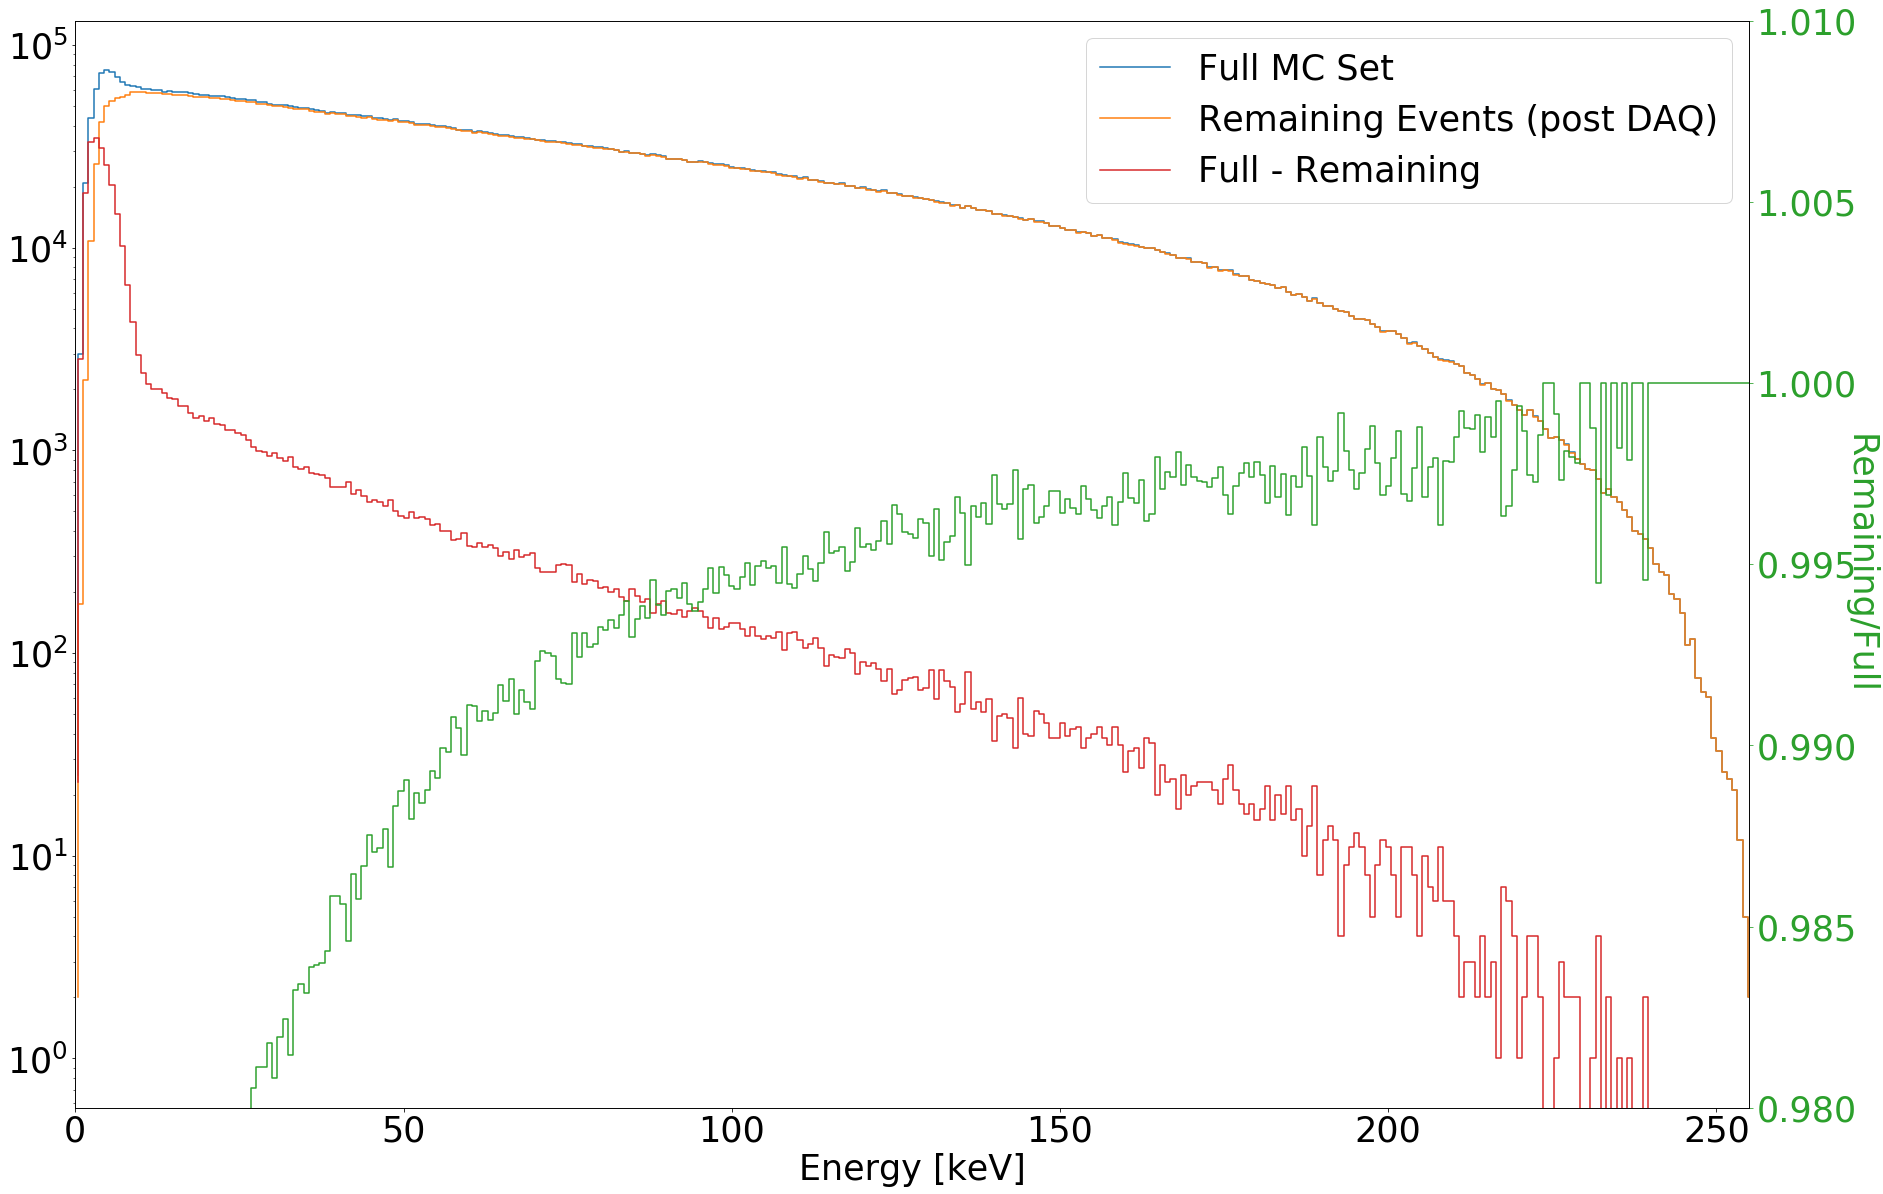

In [26]:
bins,rang=500,[0,400]
full_histo,bins=np.histogram(sim.energy,bins=bins,range=rang)
daq_histo,bins=np.histogram(sim.energy[daqmask],bins=bins,range=rang)
bins=pd.cbins(bins)
full_histo,daq_histo=full_histo.astype(float),daq_histo.astype(float)


fs=35
fig,ax=subplots(figsize=(30,20))
plot(bins,full_histo,ls='steps',label='Full MC Set')
plot(bins,daq_histo,ls='steps',label='Remaining Events (post DAQ)')
plot(bins,full_histo-daq_histo,color='C3',ls='steps',label='Full - Remaining')

ax2=twinx()
ax2.plot(bins,daq_histo/full_histo,color='C2',ls='steps')

ax.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs,colors='C2')
ax2.set_ylabel('Remaining/Full',labelpad=20,rotation=270,fontsize=fs,color='C2')
ax2.set_ylim(.98,1.01)
ax.legend(fontsize=fs)
ax.set_xlim(0,255)
ax.set_xlabel('Energy [keV]',fontsize=fs)
ax.set_yscale('log')
savefig('./plots/daq_trig_eff-single_ev')
show()


#### Following two slides compare summed spectra (sum w/ DAQ Filter & sum w/out DAQ filter)

In [39]:
run=0
sim=np.load(path+'multi_{:d}_window-100_thresh-50.0.npy'.format(run))
sim_daq=np.load(path+'multi_{:d}_window-100_thresh-50.0-daq_filt.npy'.format(run))
sim=sim.view(np.recarray)
sim_daq=sim_daq.view(np.recarray)
sim.energy=sim.energy
sim_daq.energy=sim_daq.energy

/home/noah/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


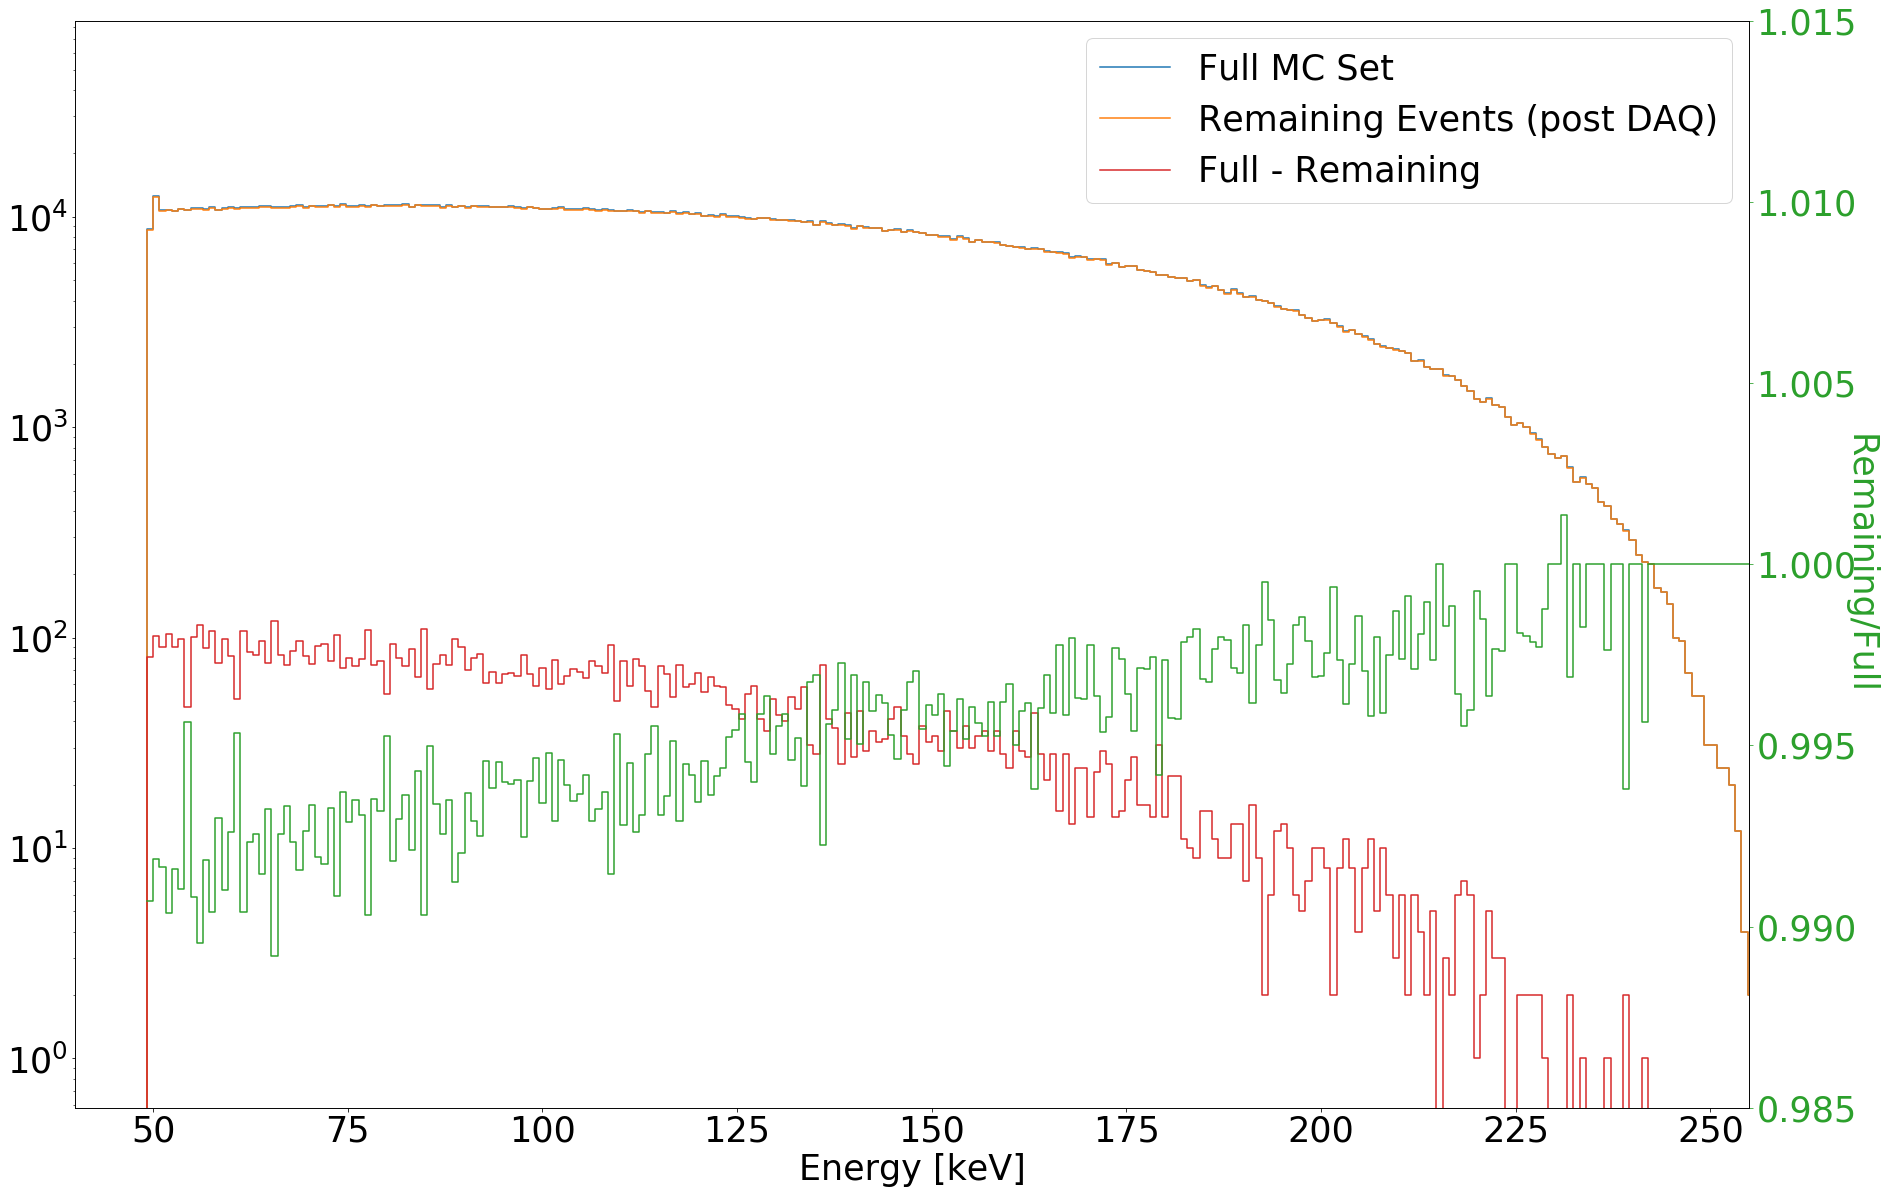

In [48]:
bins,rang=500,[0,400]
full_histo,bins=np.histogram(sim.energy,bins=bins,range=rang)
daq_histo,bins=np.histogram(sim_daq.energy,bins=bins,range=rang)
bins=pd.cbins(bins)
full_histo,daq_histo=full_histo.astype(float),daq_histo.astype(float)


fs=35
fig,ax=subplots(figsize=(30,20))
plot(bins,full_histo,ls='steps',label='Full MC Set')
plot(bins,daq_histo,ls='steps',label='Remaining Events (post DAQ)')
plot(bins,full_histo-daq_histo,color='C3',ls='steps',label='Full - Remaining')

ax2=twinx()
ax2.plot(bins,daq_histo/full_histo,color='C2',ls='steps')

ax.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs,colors='C2')
ax2.set_ylabel('Remaining/Full',labelpad=20,rotation=270,fontsize=fs,color='C2')
ax2.set_ylim(.985,1.015)
ax.legend(fontsize=fs)
ax.set_xlim(40,255)
ax.set_xlabel('Energy [keV]',fontsize=fs)
ax.set_yscale('log')
savefig('./plots/daq_trig_eff')
show()
